In [0]:
import numpy as np
import os,cv2
import pickle    

In [0]:
X = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data3a/training/featuresrgb.pickle", "rb"))
Y = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data3a/training/labelsrgb.pickle", "rb"))
X1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data3a/validation/featuresrgb.pickle", "rb"))
Y1 = pickle.load(open("/content/drive/My Drive/car-damage-dataset.tar/data3a/validation/labelsrgb.pickle", "rb"))

X=X/255
X1=X1/255
Y=np.array(Y)
Y1=np.array(Y1)


#X=X.reshape(1856,224,224,3)
#X1=X1.reshape(460,224,224,3)

In [0]:
#from keras.utils import to_categorical
from keras.applications import VGG16
from keras import models 
from keras import layers
from keras.optimizers import SGD

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers except the last 4 layers
for layer in base_model.layers[:-4]:
	layer.trainable = False

# Check the trainable status of the individual layers
for layer in base_model.layers:
	print(layer, layer.trainable)

# Create the model
model = models.Sequential()

model.add(base_model)

# add new classifier layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



<keras.engine.input_layer.InputLayer object at 0x7f98a40f0cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f98a40f0d68> False
<keras.layers.convolutional.Conv2D object at 0x7f98a40f0f28> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98a40f0fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f988c9ac668> False
<keras.layers.convolutional.Conv2D object at 0x7f98a40fbeb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f98a40edac8> False
<keras.layers.convolutional.Conv2D object at 0x7f98a40ed908> False
<keras.layers.convolutional.Conv2D object at 0x7f988c9725f8> False
<keras.layers.convolutional.Conv2D object at 0x7f988c972ef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f988c97dc18> False
<keras.layers.convolutional.Conv2D object at 0x7f988c97da58> False
<keras.layers.convolutional.Conv2D object at 0x7f988c984748> False
<keras.layers.convolutional.Conv2D object at 0x7f988c98a320> False
<keras.layers.pooling.MaxPooling2D object at 0x7f988c98ad68>

In [0]:
history=model.fit(X,Y, batch_size=10,epochs=5, validation_split=0.1)
test_loss, test_acc = model.evaluate(X1, Y1)
print('test acc= ',test_acc)
print('test loss= ',test_loss)

Train on 881 samples, validate on 98 samples
Epoch 1/5
881/881 [==============================] - 10s 11ms/step - loss: 1.1754 - accuracy: 0.3939 - val_loss: 0.9673 - val_accuracy: 0.6327
Epoch 2/5
881/881 [==============================] - 10s 11ms/step - loss: 0.8874 - accuracy: 0.5698 - val_loss: 0.7929 - val_accuracy: 0.6327
Epoch 3/5
881/881 [==============================] - 10s 11ms/step - loss: 0.7709 - accuracy: 0.6459 - val_loss: 0.7587 - val_accuracy: 0.6020
Epoch 4/5
881/881 [==============================] - 10s 11ms/step - loss: 0.6555 - accuracy: 0.7299 - val_loss: 0.6611 - val_accuracy: 0.7347
Epoch 5/5
171/171 [==============================] - 1s 6ms/step
test acc=  0.6432748436927795
test loss=  0.7980947801244189


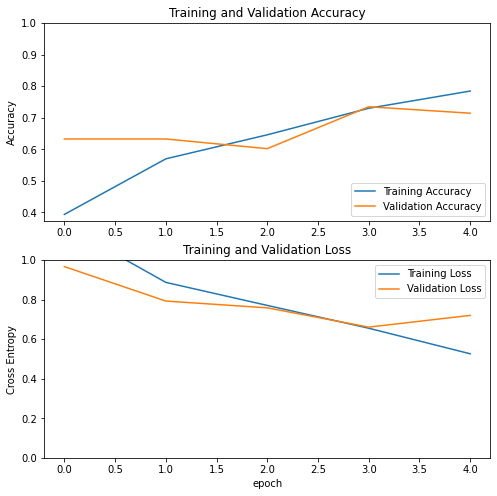

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
pickle_out=open("model3.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close() 

In [0]:
model2 = pickle.load(open("/content/model1.pickle", "rb"))

In [0]:
img_arr = cv2.imread(os.path.join('/content/images.jpg'))
new_arr = cv2.resize(img_arr, (224, 224))
image = np.expand_dims(new_arr, axis=0)
image=image/255

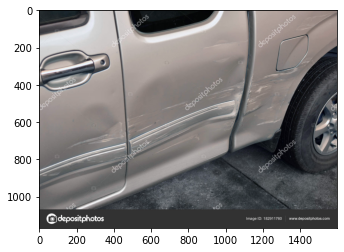

In [0]:
plt.imshow(img_arr)

In [0]:
severity=['minor','moderate','severe']
severity[np.argmax(model.predict(image))]

'minor'

[[4.5115016e-11 5.9146754e-05 9.9994087e-01]]


'severe'

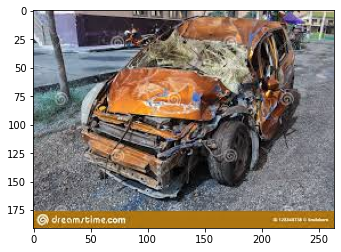

In [0]:
plt.imshow(img_arr)
severity=['minor','moderate','severe']
print(model.predict(image))
severity[np.argmax(model.predict(image))]